In [1]:

%pylab notebook
import os
import sys
sys.path = ['/Users/nanugu/gitlab/PMOIRED/pmoired'] + sys.path
import __init__ as pmoired
import matplotlib.pyplot as plt
import numpy as np
import glob


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
file=['../oifits_data/MYSTIC_L2.2023Aug04.RW_Cep.MIRCX_IDL.all_lbd.AVG10m.oifits']

#oi = pmoired.OI(file, verbose=True)
oi = pmoired.OI(file, verbose=True) # filenames=None, insname=None, targname=None,
               #   withHeader=True, medFilt=None, binning=None,
               #  tellurics=None, debug=False, verbose=True)

loadOI: loading RWCep_oifits/MYSTIC_L2.2023Aug04.RW_Cep.MIRCX_IDL.all_lbd.AVG10m.oifits
  > insname: "MIRCX" targname: "RW Cep" pipeline: ""
  > MJD: (979,) [ 60160.33016051639 .. 60160.43178159617 ]
  > E1-E2-S1-S2-W1-W2 | WL: (55,) [ 1.978 .. 2.386 ] um (R~289) {'T3': 20, 'VIS': 15, 'VIS2': 15} | TELL: False 


In [3]:
# SIMPLEST FIT - IS THE DISK RESOLVED IN |V| (V2)?

obs = ['V2','T3PHI']
fit = {
    # -- observable to fit
    'obs': obs,
    'min error': {'T3PHI':5.0},
    'min relative error':{'V2':0.1},
    'ignore negative flux':False,
}
oi.setupFit(fit, update=False, debug=False)


model={'env,az amp1':           0.459, # +/- 0.021
'env,az amp2':           0.335, # +/- 0.022
'env,az amp3':           0.162, # +/- 0.011
'env,az projang1':       90.48, # +/- 1.30
'env,az projang2':       -450.55, # +/- 1.33
'env,az projang3':       -19.87, # +/- 0.88
'env,diamout':           4.555, # +/- 0.033
'env,line_1_f':          0.0905, # +/- 0.0033
'env,line_1_truncexp':   33.05, # +/- 1.44
'env,line_2_f':          0.0652, # +/- 0.0058
'env,line_3_f':          0.0969, # +/- 0.0098
'envVEL':                2254.1, # +/- 15.4
'env,f':                 0.0,
'env,incl':              '$star,incl',
'env,line_1_wl0':        '2.2935*(1+$envVEL/3.e5)',
'env,line_2_truncexp':   '$env,line_1_truncexp',
'env,line_2_wl0':        '2.3227*(1+$envVEL/3.e5)',
'env,line_3_truncexp':   '$env,line_1_truncexp',
'env,line_3_wl0':        '2.3525*(1+$envVEL/3.e5)',
'env,profile':           '$R**-2',
'env,projang':           '$star,projang',
'env,diamin':            '$star,diam',
'star,alpha':            0.000, # +/- 0.056
'star,diam':             2.482, # +/- 0.012
'star,incl':             30.44, # +/- 0.42
'star,projang':          -176.94, # +/- 0.60
'ABS1':                  0.5,
'ABS2':                  '$ABS1',
'ABS3':                  '$ABS1',
'spot01,F0':             0.0789, # +/- 0.0042
'spot01,PA':             1.4781, # +/- 0.0063
'spot01,dist':           0.8227, # +/- 0.0093
'spot01,fwhm':           0.924, # +/- 0.013
'spot02,F0':             0.0430, # +/- 0.0024
'spot02,PA':             2.914, # +/- 0.013
'spot02,dist':           0.699, # +/- 0.015
'spot02,fwhm':           0.719, # +/- 0.035
'spot03,F0':             0.0902, # +/- 0.0058
'spot03,PA':             4.764, # +/- 0.012
'spot03,dist':           0.474, # +/- 0.017
'spot03,fwhm':           0.931, # +/- 0.016
'spot01,line_1_f':       '-$ABS1*$spot01,F0*($spot01,line_1_wl0/2.2)**-3.4',
'spot01,line_1_truncexp':'$env,line_1_truncexp',
'spot01,line_1_wl0':     '$env,line_1_wl0',
'spot01,line_2_f':       '-$ABS2*$spot01,F0*($spot01,line_2_wl0/2.2)**-3.4',
'spot01,line_2_truncexp':'$env,line_1_truncexp',
'spot01,line_2_wl0':     '$env,line_2_wl0',
'spot01,line_3_f':       '-$ABS3*$spot01,F0*($spot01,line_3_wl0/2.2)**-3.4',
'spot01,line_3_truncexp':'$env,line_1_truncexp',
'spot01,line_3_wl0':     '$env,line_3_wl0',
'spot01,spectrum':       '$spot01,F0*($WL/2.2)**-3.4',
'spot01,x':              '$spot01,dist*np.sin($spot01,PA)',
'spot01,y':              '$spot01,dist*np.cos($spot01,PA)',
'spot02,line_1_f':       '-$ABS1*$spot02,F0*($spot02,line_1_wl0/2.2)**-3.4',
'spot02,line_1_truncexp':'$env,line_1_truncexp',
'spot02,line_1_wl0':     '$env,line_1_wl0',
'spot02,line_2_f':       '-$ABS2*$spot02,F0*($spot02,line_2_wl0/2.2)**-3.4',
'spot02,line_2_truncexp':'$env,line_1_truncexp',
'spot02,line_2_wl0':     '$env,line_2_wl0',
'spot02,line_3_f':       '-$ABS3*$spot02,F0*($spot02,line_3_wl0/2.2)**-3.4',
'spot02,line_3_truncexp':'$env,line_1_truncexp',
'spot02,line_3_wl0':     '$env,line_3_wl0',
'spot02,spectrum':       '$spot02,F0*($WL/2.2)**-3.4',
'spot02,x':              '$spot02,dist*np.sin($spot02,PA)',
'spot02,y':              '$spot02,dist*np.cos($spot02,PA)',
'spot03,line_1_f':       '-$ABS1*$spot03,F0*($spot03,line_1_wl0/2.2)**-3.4',
'spot03,line_1_truncexp':'$env,line_1_truncexp',
'spot03,line_1_wl0':     '$env,line_1_wl0',
'spot03,line_2_f':       '-$ABS2*$spot03,F0*($spot03,line_2_wl0/2.2)**-3.4',
'spot03,line_2_truncexp':'$env,line_1_truncexp',
'spot03,line_2_wl0':     '$env,line_2_wl0',
'spot03,line_3_f':       '-$ABS3*$spot03,F0*($spot03,line_3_wl0/2.2)**-3.4',
'spot03,line_3_truncexp':'$env,line_1_truncexp',
'spot03,line_3_wl0':     '$env,line_3_wl0',
'spot03,spectrum':       '$spot03,F0*($WL/2.2)**-3.4',
'spot03,x':              '$spot03,dist*np.sin($spot03,PA)',
'spot03,y':              '$spot03,dist*np.cos($spot03,PA)',
'star,F0':               0.44,
'star,line_1_f':         '-$ABS1*$star,F0*($star,line_1_wl0/2.2)**-3.4',
'star,line_1_truncexp':  '$env,line_1_truncexp',
'star,line_1_wl0':       '$env,line_1_wl0',
'star,line_2_f':         '-$ABS2*$star,F0*($star,line_2_wl0/2.2)**-3.4',
'star,line_2_truncexp':  '$env,line_1_truncexp',
'star,line_2_wl0':       '$env,line_2_wl0',
'star,line_3_f':         '-$ABS3*$star,F0*($star,line_3_wl0/2.2)**-3.4',
'star,line_3_truncexp':  '$env,line_1_truncexp',
'star,line_3_wl0':       '$env,line_3_wl0',
'star,profile':          '$MU**$star,alpha',
'star,spectrum':         '$star,F0*($WL/2.2)**-3.4',
}

In [4]:
doNotFit = []
oi.doFit(model=model, fitOnly=None, doNotFit=doNotFit, 
                  verbose=2, maxfev=10000, ftol=1e-5, epsfcn=1e-8, follow=None,\
                  prior=None, autoPrior=False)



[dpfit] 31 FITTED parameters: ['ABS1', 'env,az amp1', 'env,az amp2', 'env,az amp3', 'env,az projang1', 'env,az projang2', 'env,az projang3', 'env,diamout', 'env,f', 'env,line_1_f', 'env,line_1_truncexp', 'env,line_2_f', 'env,line_3_f', 'envVEL', 'spot01,F0', 'spot01,PA', 'spot01,dist', 'spot01,fwhm', 'spot02,F0', 'spot02,PA', 'spot02,dist', 'spot02,fwhm', 'spot03,F0', 'spot03,PA', 'spot03,dist', 'spot03,fwhm', 'star,F0', 'star,alpha', 'star,diam', 'star,incl', 'star,projang']
[dpfit] epsfcn= 1e-08 ftol= 1e-05
[dpfit] using scipy.optimize.leastsq
[dpfit] Wed Aug 14 23:21:07 2024 063/002 CHI2: 8.3721e+00|
[dpfit] Wed Aug 14 23:21:17 2024 130/004 CHI2: 5.4732e+00|
[dpfit] Wed Aug 14 23:21:27 2024 200/006 CHI2: 4.9717e+00|
[dpfit] Wed Aug 14 23:21:37 2024 270/008 CHI2: 4.8943e+00|
[dpfit] Wed Aug 14 23:21:48 2024 337/010 CHI2: 4.8734e+00|
[dpfit] Wed Aug 14 23:21:58 2024 406/013 CHI2: 4.8707e+00|
[dpfit] Wed Aug 14 23:22:08 2024 473/015 CHI2: 4.8697e+00|
[dpfit] Wed Aug 14 23:22:18 2024 54

<IPython.core.display.Javascript object>


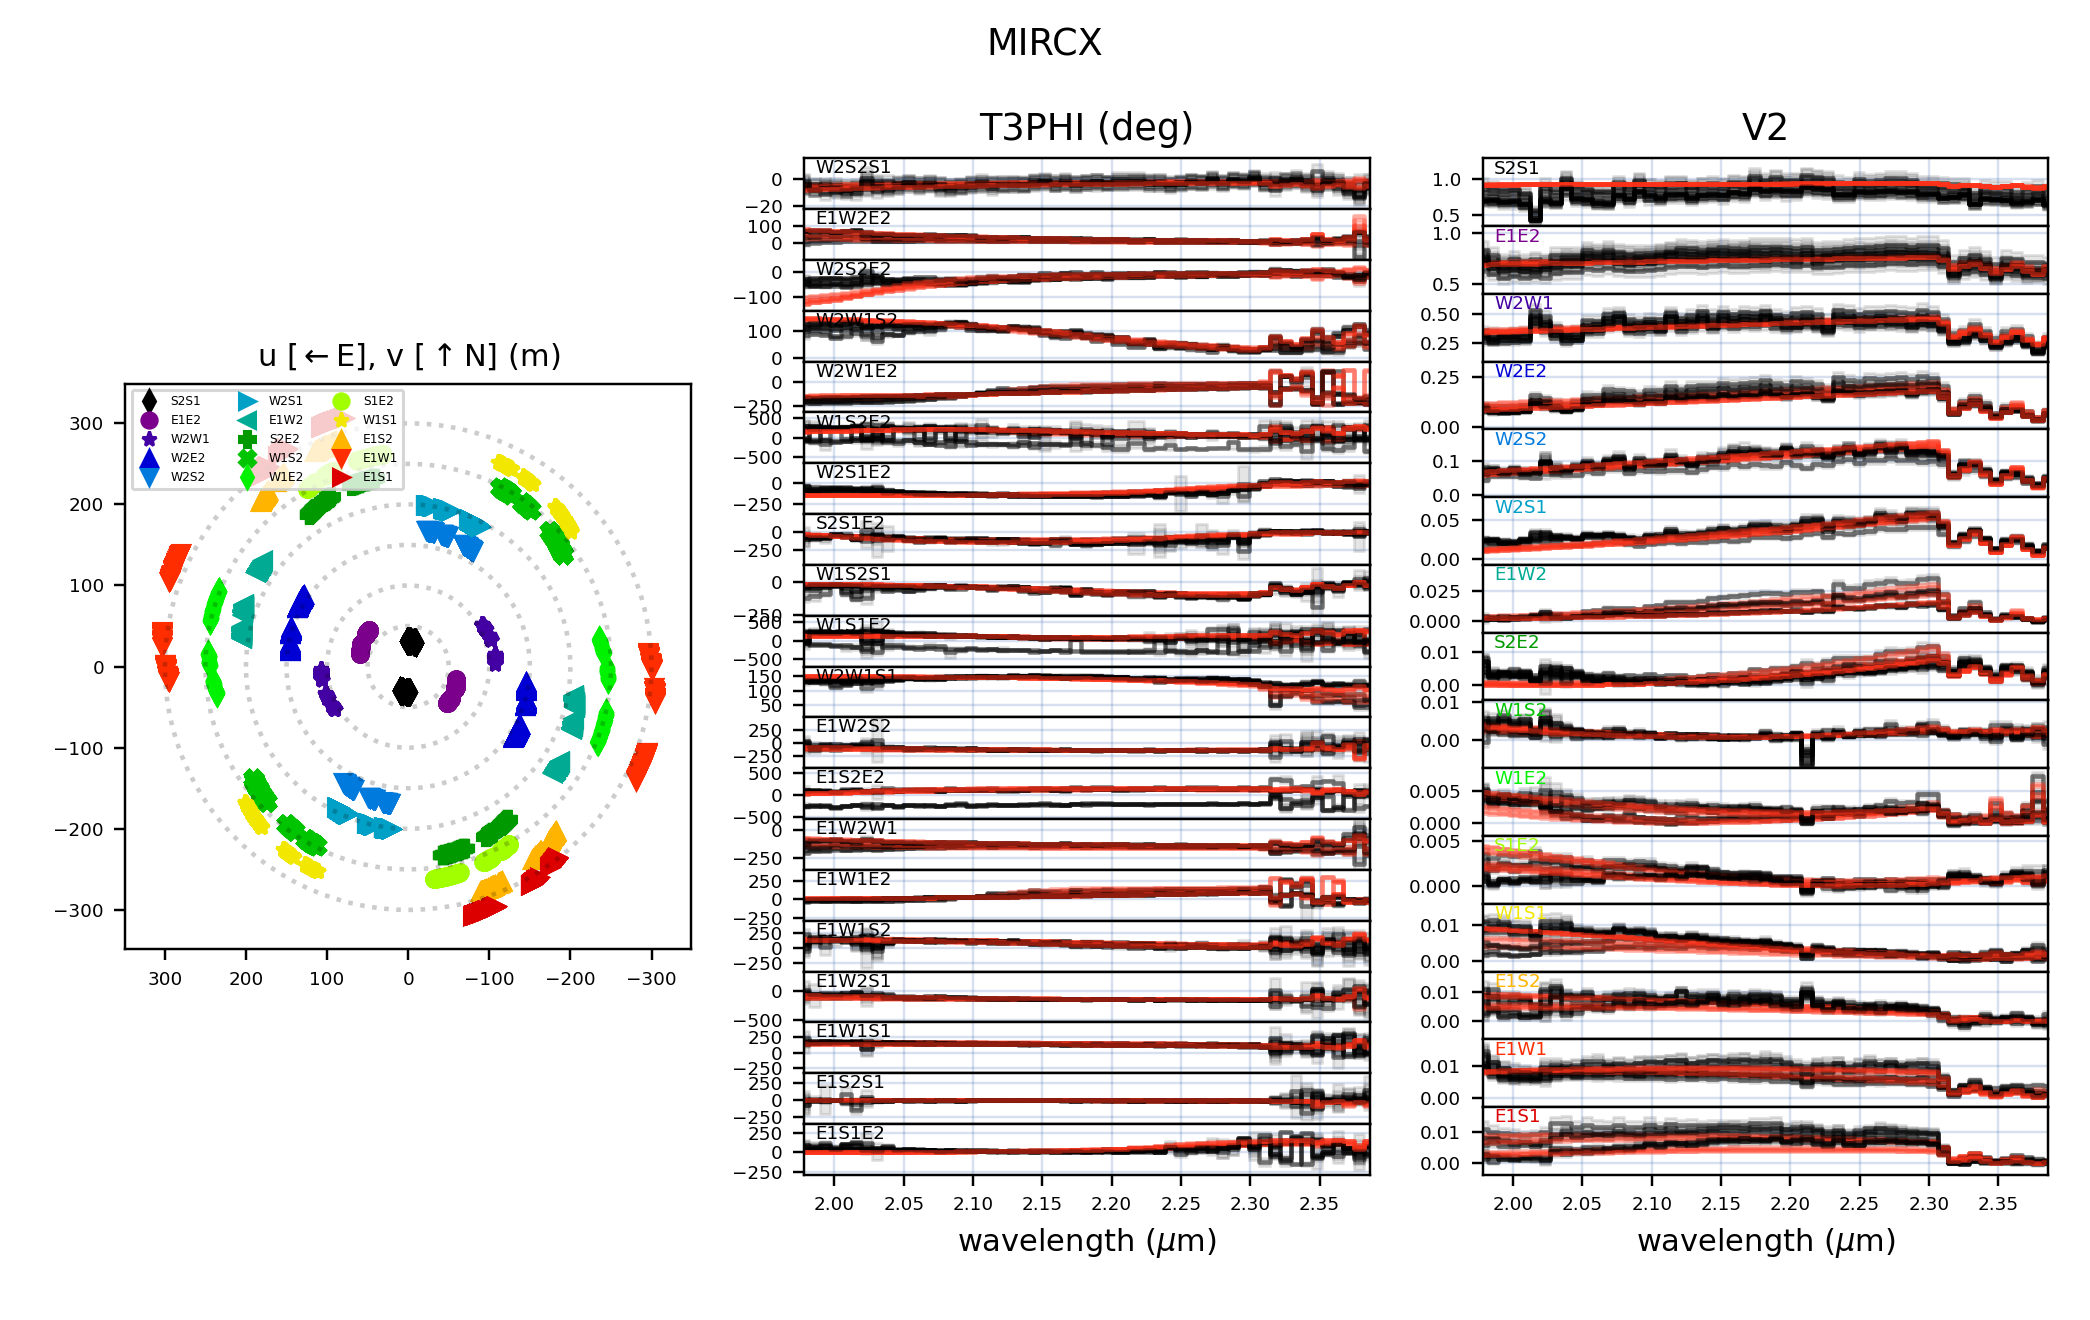

<IPython.core.display.Javascript object>


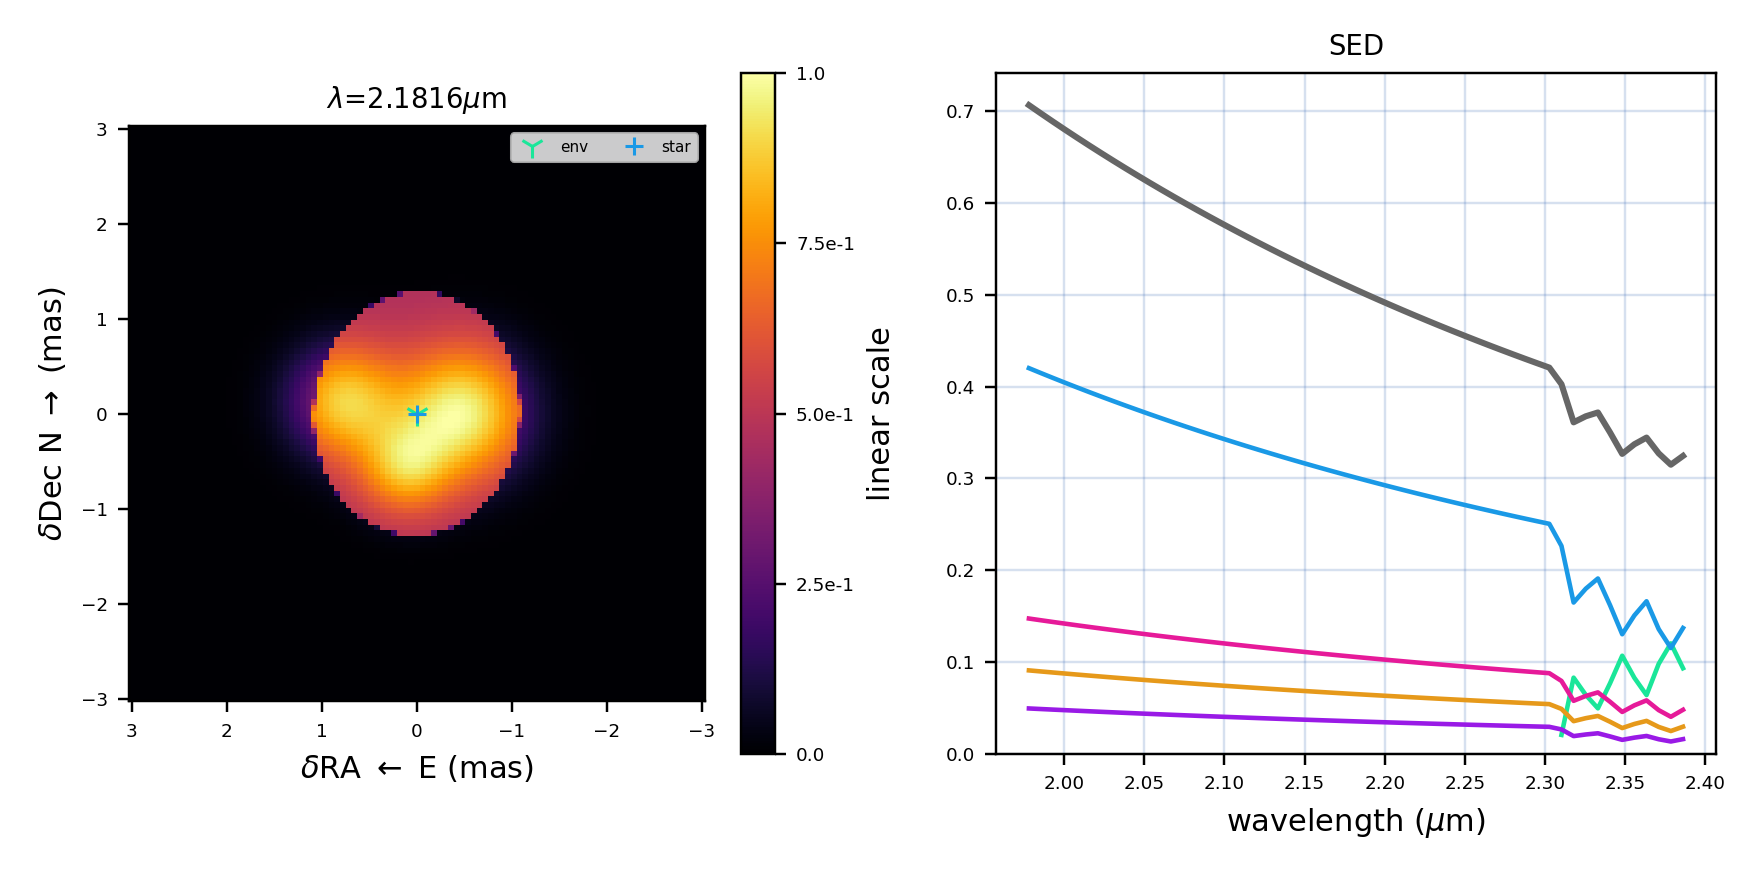

In [5]:
model_best = oi.bestfit['best'].copy()
imWl0 = [2.2006, 2.314, 2.3746]
oi.show(model=model_best, imWl0=imWl0, logV=1, fig=0,  imFov=6, spectro=True, imMax='99.999', imPow=1)